In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize the data (scale pixel values to the range 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Build the Sequential model using Input layer
model = Sequential([
    Input(shape=(28, 28)),               
    Flatten(),                           
    Dense(128, activation='relu'),       
    Dropout(0.2),                        
    Dense(10, activation='softmax')     
])

In [6]:
# Compile the model
model.compile(
    optimizer='adam',                      
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']                   
)

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,                      
    validation_split=0.2,                 
    epochs=10,                            
    batch_size=32,                         
    verbose=1                              
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8461 - loss: 0.5275 - val_accuracy: 0.9558 - val_loss: 0.1549
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9518 - loss: 0.1625 - val_accuracy: 0.9646 - val_loss: 0.1201
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1203 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9726 - loss: 0.0932 - val_accuracy: 0.9729 - val_loss: 0.0922
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0819 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0666 - val_accuracy: 0.9743 - val_loss: 0.0853
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0608 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9828 - loss: 0.0522 - 

In [8]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0881
Test Accuracy: 0.9781000018119812
Test Loss: 0.07219000905752182


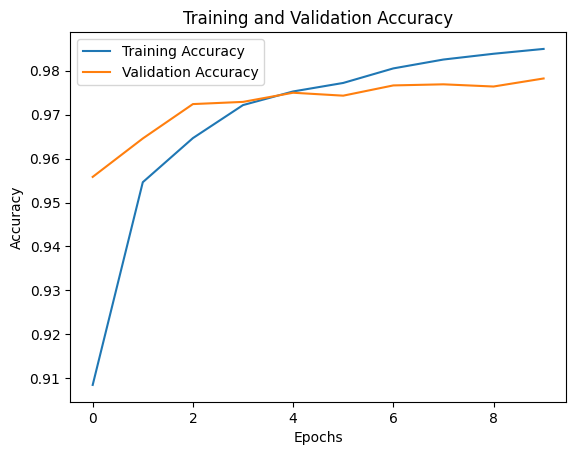

In [9]:
# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

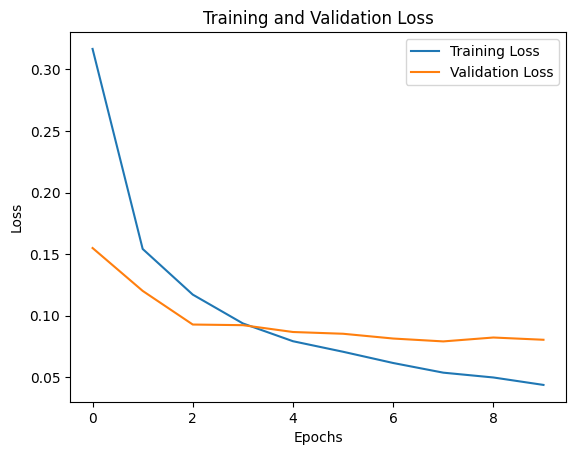

In [10]:
# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Make predictions on the test data
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


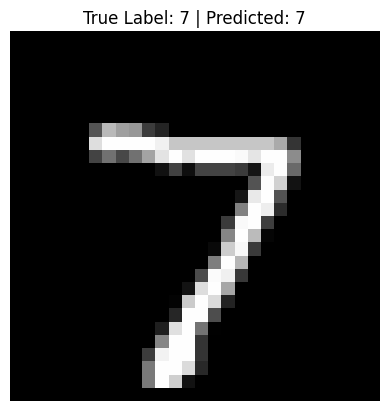

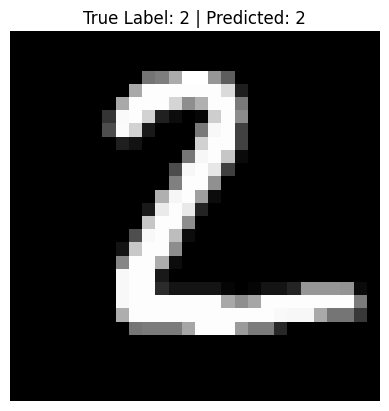

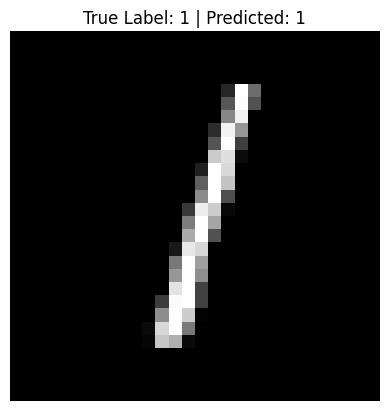

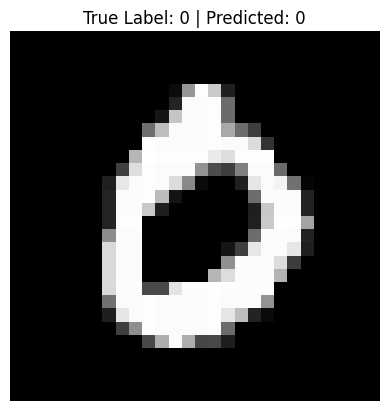

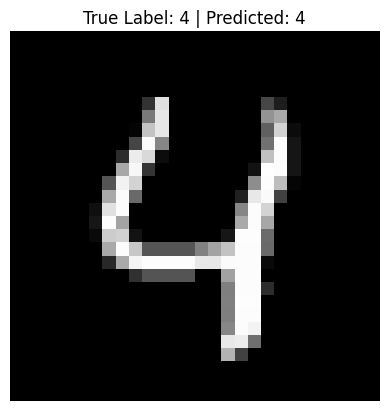

In [12]:
# Visualize some predictions
import numpy as np
for i in range(5): 
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"True Label: {y_test[i]} | Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()